In [1]:
import pandas as pd

In [2]:
df=pd.read_html("/content/drive/MyDrive/aiml/DailyWiseMarketArrivals.html")
df

[                                      0
 0  DATE WISE MARKET ARRIVALS AND PRICES,
           0                                                  1        2  \
 0    Crop :              Select  Garlic  Onion  Potato  Tomato   Year :   
 1  Market :  All  ABOHAR(PB)  AGRA(UP)  AHMEDABAD(GUJ)  AHM...  Month :   
 2       NaN                                                NaN      NaN   
 
                                                    3  
 0  All  2022  2021  2020  2019  2018  2017  2016 ...  
 1  All  January  February  March  April  May  Jun...  
 2                                                NaN  ,
                                                  0
 0  DATE WISE MARKET ARRIVALS AND PRICES FOR POTATO,
              Date     Market  Arrival(q) Price Minimum (Rs/q)  \
 0     01/Jan/2005  BANGALORE        6823                  440   
 1     03/Jan/2005  BANGALORE        5046                  400   
 2     05/Jan/2005  BANGALORE        6413                  420   
 3     06/Jan/200

In [3]:
df=pd.read_html("/content/drive/MyDrive/aiml/DailyWiseMarketArrivals.html")[3]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700
4181,22/Feb/2022,BANGALORE,7180,1600,2000,1800


In [4]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [8]:
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4177,15/Feb/2022,BANGALORE,9680,1500,1800,1650
4178,16/Feb/2022,BANGALORE,5780,1500,1800,1650
4179,17/Feb/2022,BANGALORE,8000,1400,1600,1500
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700


In [7]:
df.to_csv("Potato.csv",index=False)

In [9]:
#Regression vs forecasting
#Regression is prediction of a value with respect to another continuos value
#Forecasting is prediction of a value with respect to time or date

In [10]:
#prophet is a library developed by Facebook
#the input given to fbprophet should be a dataframe
#The dataframe should have 2 columns ds and y 
#The ds column(date) should be of the datatype "datetime"
#The y column should be a numeric datatype

In [11]:
df.head()

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425


In [13]:
df.rename(columns={'Modal Price (Rs/q)':'y','Date':'ds'},inplace=True)  #inplace is used because changes should effect in the original
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425


In [17]:
df_new=df[['ds','y']]
df_new

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4177,15/Feb/2022,1650
4178,16/Feb/2022,1650
4179,17/Feb/2022,1500
4180,18/Feb/2022,1700


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4182 non-null   object
 1   y       4182 non-null   object
dtypes: object(2)
memory usage: 98.0+ KB


In [19]:
#columnns are not in required formats
#convert ds into datetime format and y into numeric datatype

In [21]:
df_new['y']=df_new['y'].astype(int) #to convert datatype into integer
df_new['ds']=pd.to_datetime(df_new['ds'])   #to convert datatype into datetime which is in pandas library 
#if date fromat is not proper then we have to specify the format in pd.to_datetime() function 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4182 non-null   datetime64[ns]
 1   y       4182 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.0 KB


In [23]:
df_new

,ds,y
0,2005-01-01,510
1,2005-01-03,500
2,2005-01-05,500
3,2005-01-06,500
4,2005-01-07,425
...,...,...
4177,2022-02-15,1650
4178,2022-02-16,1650
4179,2022-02-17,1500
4180,2022-02-18,1700


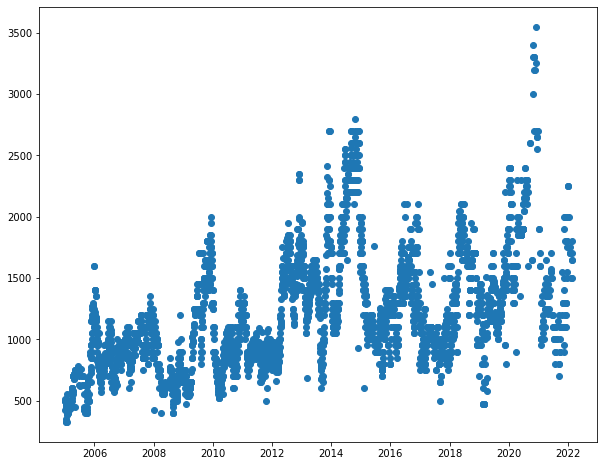

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [29]:
import numpy as np
df_new['y']=np.where(df_new['y']>3000,np.nan,df_new['y'])   #filling outliers with nan values  (peak values in year 2021 are the outliers)
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2005-01-01,510.0
1,2005-01-03,500.0
2,2005-01-05,500.0
3,2005-01-06,500.0
4,2005-01-07,425.0
...,...,...
4177,2022-02-15,1650.0
4178,2022-02-16,1650.0
4179,2022-02-17,1500.0
4180,2022-02-18,1700.0


In [30]:
df_new.isnull().sum()  #checking for null values because we have introduced null values for outliers

ds    0
y     9
dtype: int64

In [32]:
df_new=df_new.dropna()  #dropping null(nan) values  ie outliers are removed.

In [33]:
df_new.isnull().sum()

ds    0
y     0
dtype: int64

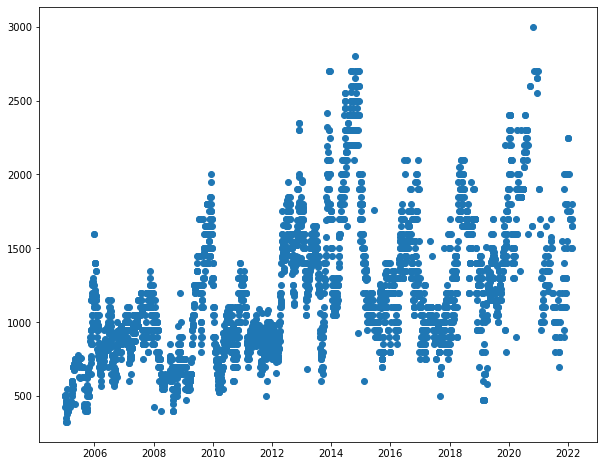

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(df_new['ds'],df_new['y'])   #check the graph there are no outliers in year 2021.
plt.show()

In [38]:
import fbprophet
ob=fbprophet.Prophet(changepoint_prior_scale=1)

In [39]:
ob.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast=ob.make_future_dataframe(periods=365,freq="D")

In [42]:
forecast=ob.predict(forecast)

In [43]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,505.157170,299.629904,933.264247,505.157170,505.157170,96.454521,96.454521,96.454521,-6.757014,-6.757014,-6.757014,103.211536,103.211536,103.211536,0.0,0.0,0.0,601.611691
1,2005-01-03,507.257935,320.280251,915.526725,507.257935,507.257935,100.111453,100.111453,100.111453,0.336445,0.336445,0.336445,99.775008,99.775008,99.775008,0.0,0.0,0.0,607.369388
2,2005-01-05,509.358700,326.350602,929.568443,509.358700,509.358700,104.423649,104.423649,104.423649,7.196252,7.196252,7.196252,97.227398,97.227398,97.227398,0.0,0.0,0.0,613.782350
3,2005-01-06,510.409083,304.928830,905.654336,510.409083,510.409083,102.856295,102.856295,102.856295,6.676795,6.676795,6.676795,96.179501,96.179501,96.179501,0.0,0.0,0.0,613.265378
4,2005-01-07,511.459466,300.849809,919.310703,511.459466,511.459466,92.495718,92.495718,92.495718,-2.714180,-2.714180,-2.714180,95.209898,95.209898,95.209898,0.0,0.0,0.0,603.955184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,2023-02-18,1854.090100,648.258738,2925.127326,861.363787,3014.784281,-173.208168,-173.208168,-173.208168,-6.757014,-6.757014,-6.757014,-166.451153,-166.451153,-166.451153,0.0,0.0,0.0,1680.881932
4528,2023-02-19,1854.429456,663.582423,2852.137219,856.052287,3018.388657,-181.534586,-181.534586,-181.534586,-10.612192,-10.612192,-10.612192,-170.922394,-170.922394,-170.922394,0.0,0.0,0.0,1672.894870
4529,2023-02-20,1854.768812,624.300630,2882.839914,850.740788,3021.993033,-174.857324,-174.857324,-174.857324,0.336445,0.336445,0.336445,-175.193769,-175.193769,-175.193769,0.0,0.0,0.0,1679.911488
4530,2023-02-21,1855.108168,647.632471,2832.822454,845.191820,3028.339754,-173.433019,-173.433019,-173.433019,5.873894,5.873894,5.873894,-179.306913,-179.306913,-179.306913,0.0,0.0,0.0,1681.675149


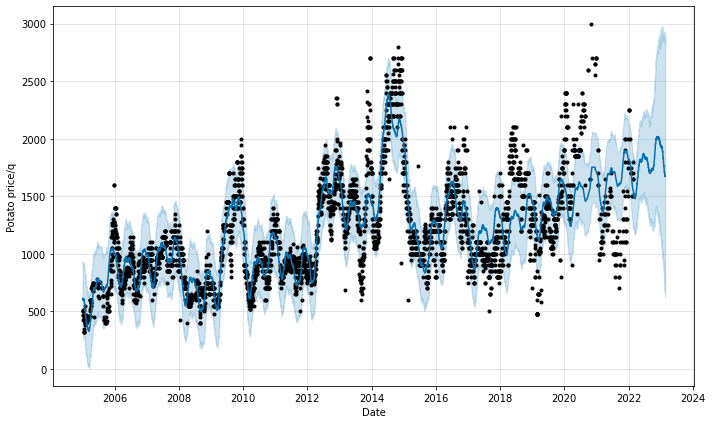

<Figure size 1080x432 with 0 Axes>

In [47]:
ob.plot(forecast,xlabel="Date",ylabel="Potato price/q")
plt.figure(figsize=(15,6))   #light blue is the predicted values.
plt.show()